# ECON408: Assignment 2

Jesse Perla, UBC

## Nolan Lu / 92071885

### Instructions

-   Edit the above cell to include your name and student number.
-   Submit just this `ipynb` to Canvas. Do not rename, it associates
    your student number with the submission automatically.

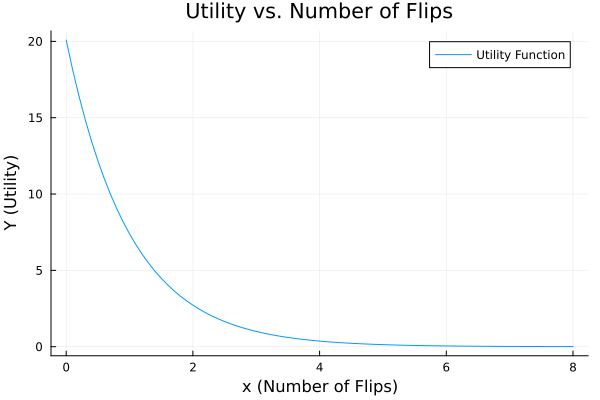

In [1]:
using Distributions, Plots, LaTeXStrings, LinearAlgebra, Statistics, Random

using Plots

# Define the utility function
utility(x) = 1 / exp(x - 3)

# Generate a range of x values from 0 to 8 for a broad view
x_values = 0:0.1:8

# Calculate the utility values for each x
y_values = utility.(x_values) # The dot (.) before the parenthesis applies the function element-wise

# Plot the function
plot(x_values, y_values, label="Utility Function", xlabel="x (Number of Flips)", ylabel="Y (Utility)", title="Utility vs. Number of Flips")

## Question 1

Using the code in [Keynesian Multiplier
example](https://jlperla.github.io/ECON408/lectures/geometric_series_fixed_points.html#/keynesian-multipliers)
or looking at the lecture notes on [Geometric
Series](https://julia.quantecon.org/tools_and_techniques/geom_series.html).

Consider if the true government expenditures are $g + \sigma \epsilon$
where $\epsilon \sim N(0, 1)$ i.e., a unit normal and with
$\sigma = 0.01$. Consequently the law of motion for `y_t` becomes

$$
y_t = b y_{t-1} + i + (g + \sigma \epsilon_{t})
$$

### Part (a)

Take the code (copied below) which generates the time-path of aggregate
output from the initial condition (i.e., the `calculate_y` function) and
change it code so that it implements the new process with the random
$\epsilon$

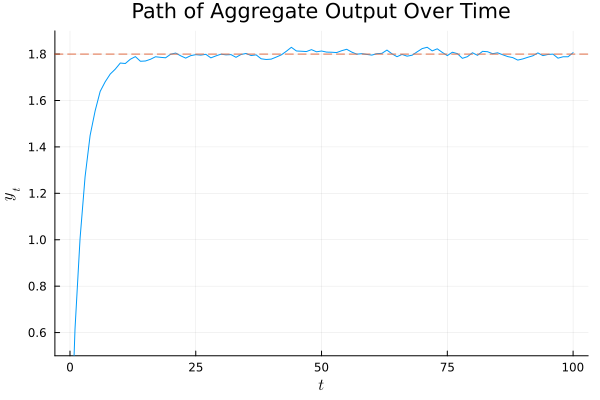

In [100]:
# modify the original code below

# Function that calculates a path of y
function calculate_y(i, b, g, T, y_init; sigma = 0.01)
    y = zeros(T+1)
    y[1] = y_init
    for t = 2:(T+1)
        y[t] = b * y[t-1] + i + (g+sigma*randn())# add rand
    end
  return y
end

# Initial values
i_0 = 0.3
g_0 = 0.3
b = 2/3 # proportion of income to consumption
y_init = 0
T = 100

plt = plot(0:T, calculate_y(i_0, b, g_0, T, y_init),
           title= "Path of Aggregate Output Over Time",
           ylim= (0.5, 1.9), xlabel = L"t", ylabel = L"y_t")
hline!([i_0 / (1 - b) + g_0 / (1 - b)], linestyle=:dash, seriestype="hline",
       legend = false)

### Part (b)

Redo the “Changing Consumption as a Fraction of Income” figure with the
random simulations by modifying the original code below

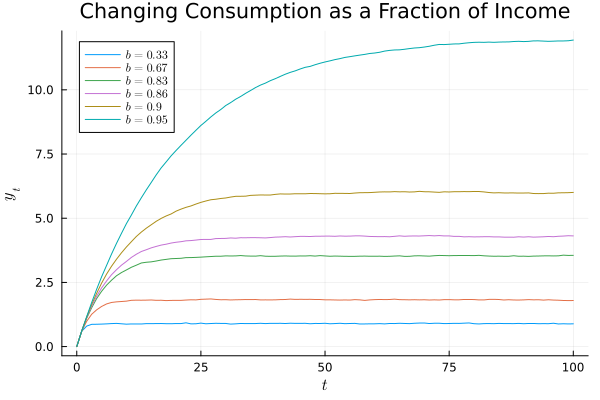

In [101]:
# modify the original code below:
# Changing fraction of consumption
bs = round.([1/3, 2/3, 5/6, 6/7, 0.9, 0.95], digits = 2)

plt = plot(title= "Changing Consumption as a Fraction of Income",
           xlabel = L"t", ylabel = L"y_t", legend = :topleft)
[plot!(plt, 0:T, calculate_y(i_0, b, g_0, T, y_init), label=L"b = %$b")
 for b in bs]
plt

### Part (c)

Redo the “An Increase in Investment on Output” and “An Increase in
Government Spending on Output” figures by modifying the original code
below

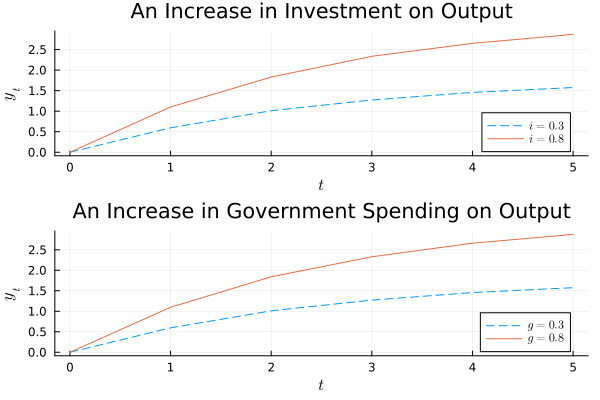

In [146]:
# modify the original code below:
x = 0:T
y_0 = calculate_y(i_0, b, g_0, T, y_init)
l = @layout [a ; b]

# Changing initial investment:
i_1 = 0.8
y_1 = calculate_y(i_1, b, g_0, T, y_init)
plt_1 = plot(x,y_0, label = L"i=0.3", linestyle= :dash,
             title= "An Increase in Investment on Output",
             xlabel = L"t", ylabel = L"y_t", legend = :bottomright)
plot!(plt_1, x, y_1, label = L"i=0.8")

# Changing government spending
g_1 = 0.8
y_1 = calculate_y(i_0, b, g_1, T, y_init)
plt_2 = plot(x,y_0, label = L"g=0.3", linestyle= :dash,
             title= "An Increase in Government Spending on Output",
             xlabel = L"t", ylabel = L"y_t", legend = :bottomright)
plot!(plt_2, x, y_1, label=L"g=0.8")
plot(plt_1, plt_2, layout = l)

Reusable functions, do not modify without clearly annotating your
changes.

In [104]:
# Iterates a function from an initial condition 
function iterate_map(f, x0, T)
    x = zeros(T + 1)
    x[1] = x0
    for t in 2:(T + 1)
        x[t] = f(x[t - 1])
    end
    return x
end

function plot45(f, xmin, xmax, x0, T; num_points = 100, label = L"h(k)",
                xlabel = "k", size = (600, 500))
    # Plot the function and the 45 degree line
    x_grid = range(xmin, xmax, num_points)
    plt = plot(x_grid, f.(x_grid); xlim = (xmin, xmax), ylim = (xmin, xmax),
               linecolor = :black, lw = 2, label, size)
    plot!(x_grid, x_grid; linecolor = :blue, lw = 2, label = nothing)

    # Iterate map and add ticks
    x = iterate_map(f, x0, T)
    if !isnothing(xlabel) && T > 1
      xticks!(x, [L"%$(xlabel)_{%$i}" for i in 0:T])
      yticks!(x, [L"%$(xlabel)_{%$i}" for i in 0:T])
    end

    # Plot arrows and dashes
    for i in 1:T
        plot!([x[i], x[i]], [x[i], x[i + 1]], arrow = :closed, linecolor = :black,
              alpha = 0.5, label = nothing)
        plot!([x[i], x[i + 1]], [x[i + 1], x[i + 1]], arrow = :closed,
              linecolor = :black, alpha = 0.5, label = nothing)
        plot!([x[i + 1], x[i + 1]], [0, x[i + 1]], linestyle = :dash,
              linecolor = :black, alpha = 0.5, label = nothing)
    end
    plot!([x[1], x[1]], [0, x[1]], linestyle = :dash, linecolor = :black,
          alpha = 0.5, label = nothing)
end


function ts_plot(f, x0, T; xlabel=L"t", label=L"k_t")
    x = iterate_map(f, x0, T)
    plot(0:T, x; xlabel, label)
    plot!(0:T, x; seriestype=:scatter, mc=:blue, alpha=0.7, label=nothing)
end

ts_plot (generic function with 1 method)

## Question 2

Take the Solow growth model in [our
lectures](https://jlperla.github.io/ECON408/lectures/deterministic_dynamics.html#/solow-growth-model)
with the code above.

In this question we will explore the depreciation parameter, $\delta$.
The baseline parameters are the same and given in the code below.

Recall that the steady state is

$$
k^* = \left(\frac{s A}{\delta}\right)^{1/(1-\alpha)}
$$

### Part (a)

With `k_0=0.25` use the `plot45` contrasting the `delta = 0.1` and
`delta = 0.001` to the existing `delta = 0.4`. Adapt the range and
domain as required.

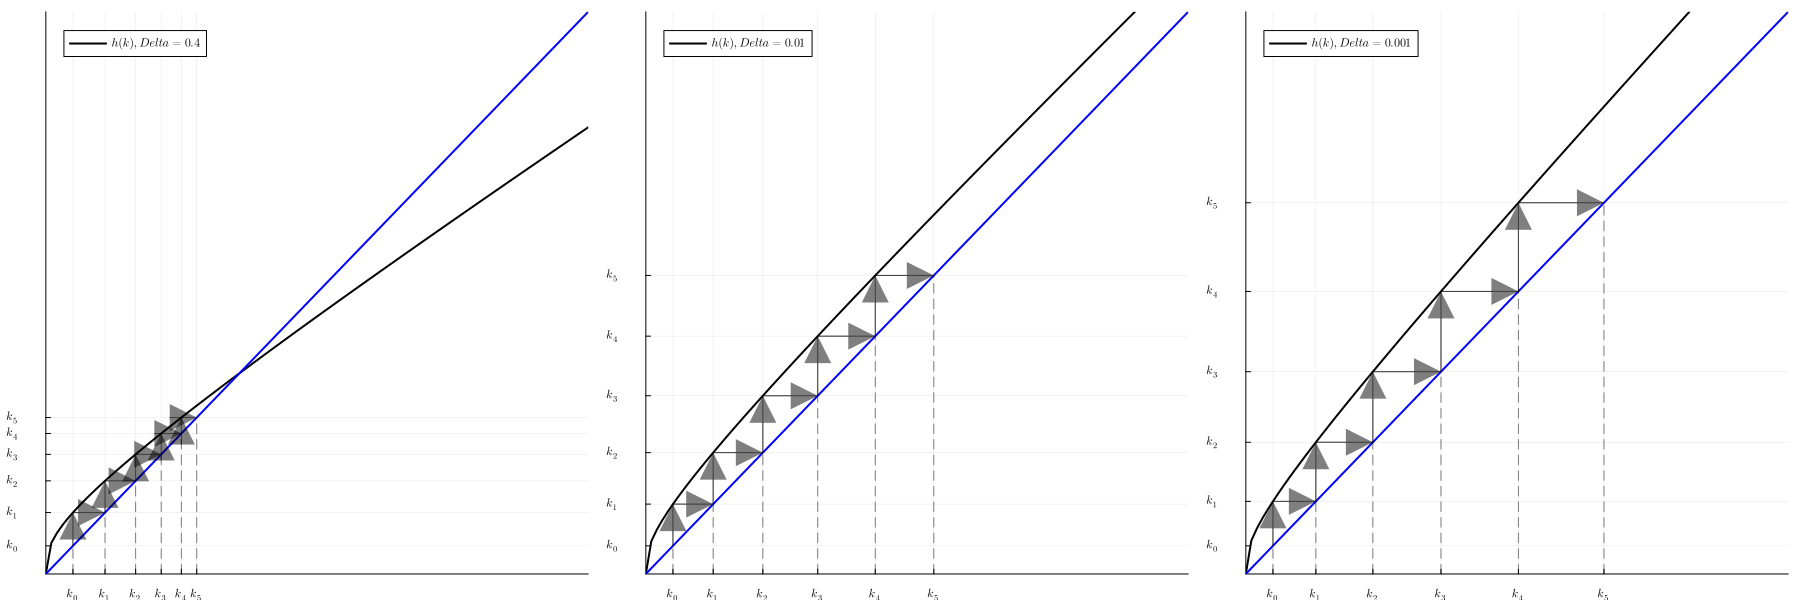

In [111]:

h(k; p) = (1 / (1 + p.g_N)) * (
   p.s * p.z_bar * k^p.alpha
   + (1 - p.delta) * k)

k_bar(p) = (p.s * p.z_bar /
      (p.g_N + p.delta))^(1/(1-p.alpha))

p = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
p_1 = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
      delta = 0.1, g_N = 0.0)
p_2 = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
      delta = 0.001, g_N = 0.0)

k_0 = 0.25
k_min = 0.0
k_max = 5
T = 5

#plt 45 combined
plt1 = plot45(k -> h(k, p = p),k_min, k_max, k_0, T; num_points = 100, label = L"h(k), Delta = 0.4 ",
            xlabel = "k", size = (600, 500))
plt2 = plot45(k -> h(k, p = p_1),k_min, k_max, k_0, T; num_points = 100, label = L"h(k), Delta = 0.01",
                xlabel = "k", size = (600, 500))
plt3 = plot45(k -> h(k, p = p_2),k_min, k_max, k_0, T; num_points = 100, label = L"h(k), Delta = 0.001",
                xlabel = "k", size = (600, 500))

combined_plot = plot(plt1, plt2, plt3, layout = (1, 3), size = (1800, 600))
            

### Part (b)

Plot the time series with `ts_plot` for those same cases

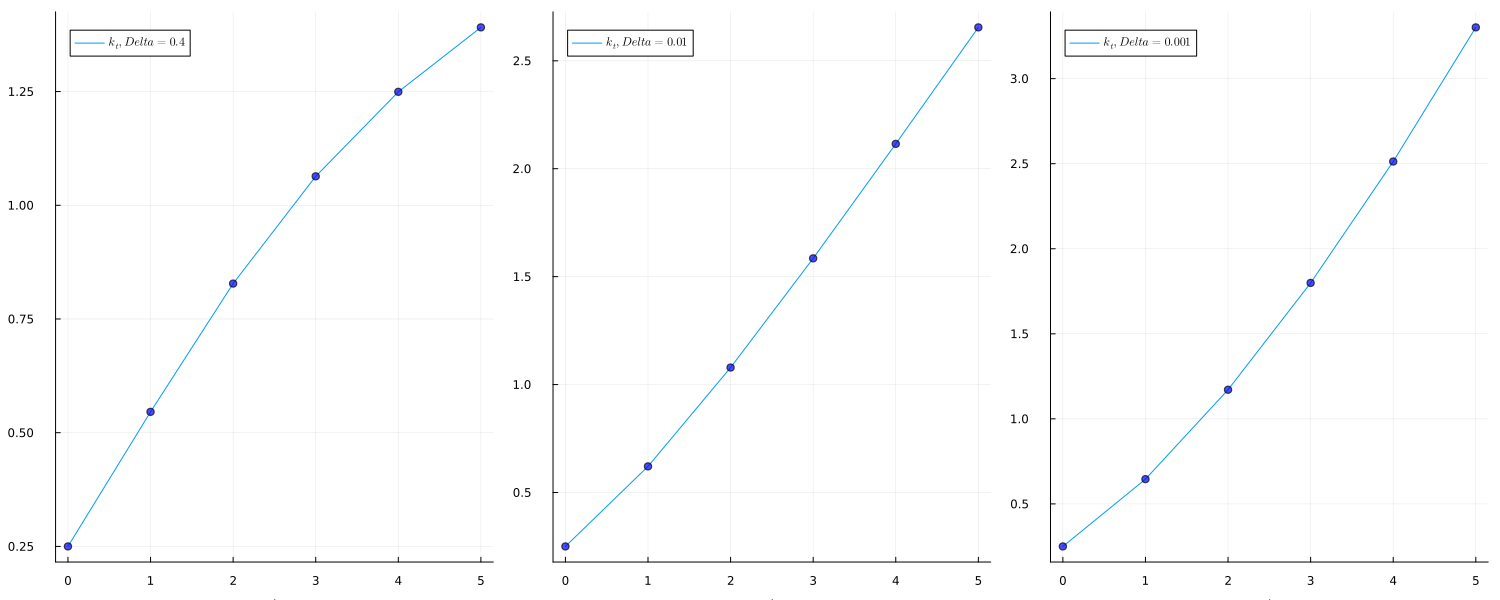

In [107]:
k_0 = 0.25

p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
k_min = 0.0
k_max = 4.0

ts_plt1 = ts_plot(k -> h(k, p = p_baseline), k_0, T; xlabel=L"t", label=L"k_t, Delta = 0.4")
ts_plt2 = ts_plot(k -> h(k, p = p_1), k_0, T; xlabel=L"t", label=L"k_t, Delta = 0.01")
ts_plt3 = ts_plot(k -> h(k, p = p_2), k_0, T; xlabel=L"t", label=L"k_t, Delta = 0.001")

combined_ts_plot = plot(ts_plt1, ts_plt2, ts_plt3, layout = (1, 3), size = (1500, 600))
 
# add code here and new cells as required.

### Part (c)

Can you interpret the results? What is happening as $\delta \to 0$ and
why?

With a lower δ, the economy's path to its steady state is less steep because each period's net addition to capital (after accounting for the very small depreciation) is larger, pushing out the steady state further. This results in a graph where the function h interesect the 45 degree line at a higher lever of k, indicating a higher steady_state capital stock. 

When we look at the graph for Kt, we also see that as δ approaches 0, the effect of depreciation on the economy diminishes due to the fact that all saved output (investments) contributs to capital accumulation with little depreciation. Without the significant counterbalancing effect of depreciation, the initial capital accumulation can proceed at an accelerated pace, overshadowing the effects of diminishing returns to capital in the early stages.

## Question 2

Take the Solow growth model in [our
lectures](https://jlperla.github.io/ECON408/lectures/deterministic_dynamics.html#/solow-growth-model)

In this question we will explore the $\alpha$ parameter. The baseline
parameters are the same and given in the code below.

### Part (a)

Find the new $k^*$ using the formula for the steady state for the case
of `alpha = 0.8` and `alpha = 0.99` contrasting with the `alpha = 0.3`
default. Hint: it might diverge

In [106]:
p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
p1 = (;z_bar = 2.0, s = 0.3, alpha = 0.8,
     delta = 0.4, g_N = 0.0)
p2 = (;z_bar = 2.0, s = 0.3, alpha = 0.99,
     delta = 0.4, g_N = 0.0)
k_min = 0.0
k_max = 4.0

k_bar(p) = (p.s * p.z_bar /
      (p.g_N + p.delta))^(1/(1-p.alpha))

k_bar_base = k_bar(p_baseline)
k_bar1 = k_bar(p1)
k_bar2 = k_bar(p2)

@show k_bar_base, k_bar1, k_bar2


(k_bar_base, k_bar1, k_bar2) = (1.7846741842265788, 7.593749999999997, 4.0656117753519514e17)


(1.7846741842265788, 7.593749999999997, 4.0656117753519514e17)

### Part (b)

Plot `ts_plot` and `plot45` for these cases, starting at `k_0=0.25` as
before for `alpha = 0.8` and `alpha = 0.99`.

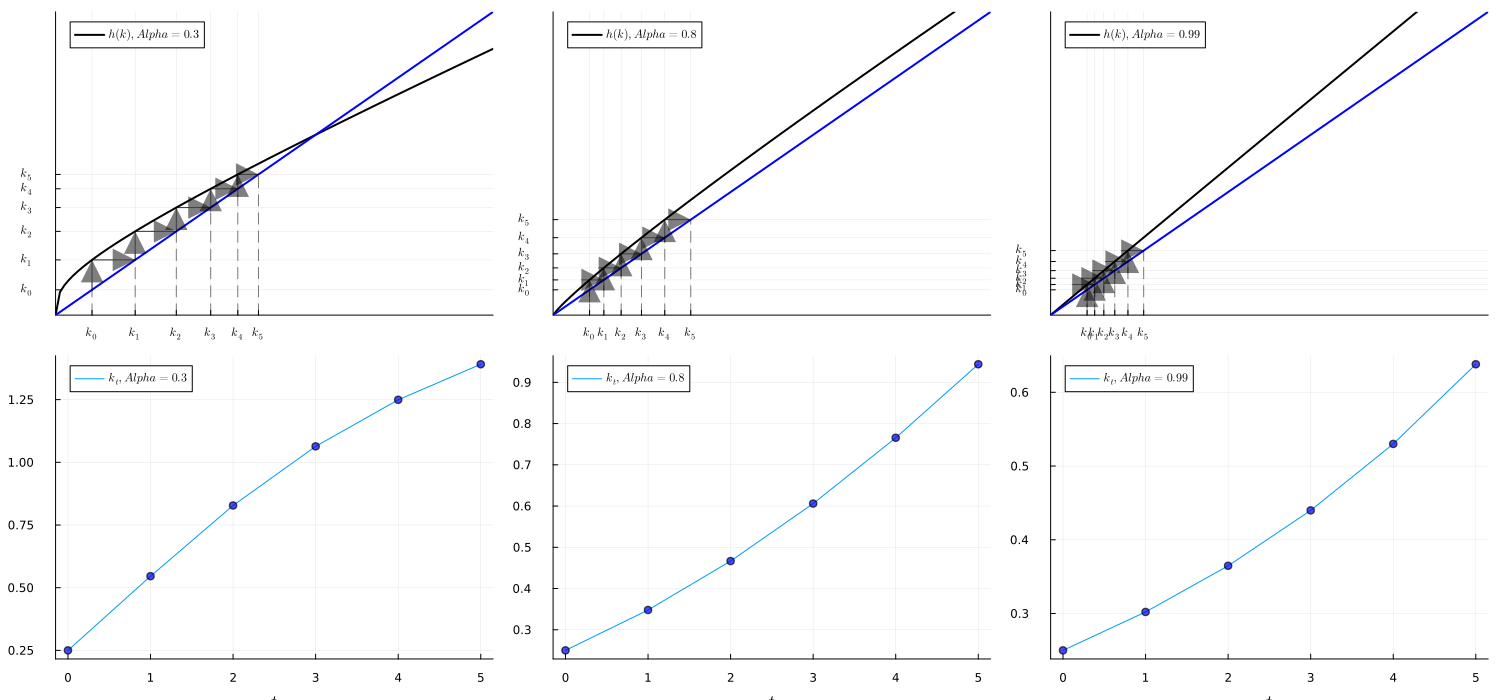

In [97]:
k_0 = 0.25
k_min = 0.0
k_max = 3.0
p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.3,
     delta = 0.4, g_N = 0.0)
# Add code and create new cells as required
p1 = (;z_bar = 2.0, s = 0.3, alpha = 0.8,
     delta = 0.4, g_N = 0.0)
p2 = (;z_bar = 2.0, s = 0.3, alpha = 0.99,
     delta = 0.4, g_N = 0.0)

     k_bar(p) = (p.s * p.z_bar /
     (p.g_N + p.delta))^(1/(1-p.alpha))


#plot 45
plt45_1 = plot45(k -> h(k, p = p_baseline),k_min, k_max, k_0, T; num_points = 100, label = L"h(k), Alpha = 0.3 ",
               xlabel = "k", size = (600, 500))
              
plt45_2 = plot45(k -> h(k, p = p1),k_min, k_max, k_0, T; num_points = 100, label = L"h(k), Alpha = 0.8",
               xlabel = "k", size = (600, 500))

plt45_3 = plot45(k -> h(k, p = p2),k_min, k_max, k_0, T; num_points = 100, label = L"h(k), Alpha = 0.99",
               xlabel = "k", size = (600, 500))

ts_plt1 = ts_plot(k -> h(k, p = p_baseline), k_0, T; xlabel=L"t", label=L"k_t, Alpha = 0.3")
ts_plt2 = ts_plot(k -> h(k, p = p1), k_0, T; xlabel=L"t", label=L"k_t, Alpha = 0.8")
ts_plt3 = ts_plot(k -> h(k, p = p2), k_0, T; xlabel=L"t", label=L"k_t, Alpha = 0.99")

combined_ts_plot = plot(plt45_1, plt45_2, plt45_3, ts_plt1, ts_plt2, ts_plt3, layout = (2, 3), size = (1500, 700))
 


### Part (c)

What is your interpretation? What is happening to the steady state and
convergence?


 As α approaches 1, the economy moves closer to a scenario with linear returns to scale in capital. The exponent (1/(1-α )becomes very large, which can lead to a dramatic increase in potentially to the point of divergence. This indicates an scenario where the economy overly relies on capital for production, with diminishing returns to capital nearly eliminated. The steady state k no longer exist.

 As alpha increases, the steady state capital k* also increases. At the same time, the convergence to the steady state is slower due to the increased effect of capital accumulation with a high alpha.


### Part (d)

Now take the same case with `alpha=0.8` but now have a higher
depreciation rate, `delta=0.8`. Plot `ts_plot` and `plot45` as before

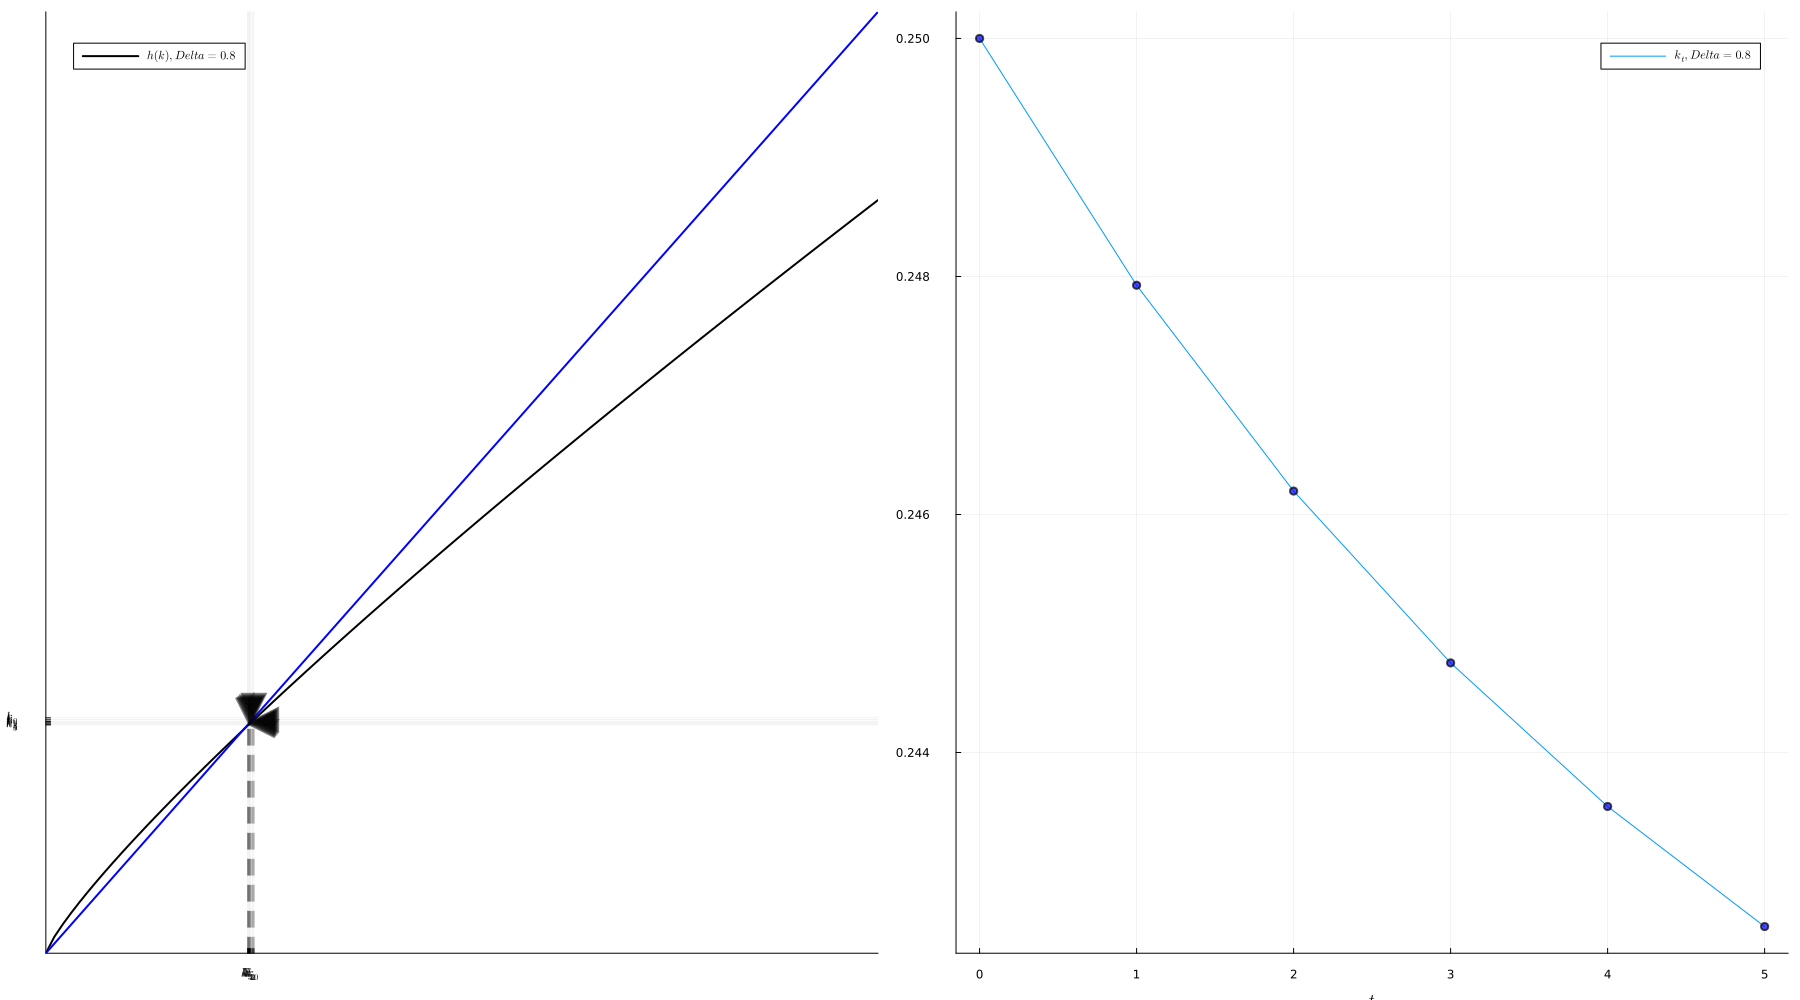

In [148]:
k_0 = 0.25
p_baseline = (;z_bar = 2.0, s = 0.3, alpha = 0.8,
     delta = 0.8, g_N = 0.0) 
     
k_0 = 0.25
k_min = 0.0
k_max = 1
T = 5
     
plt45_2d = plot45(k -> h(k, p = p_baseline),k_min, k_max, k_0, T; num_points = 100, label = L"h(k), Delta = 0.8 ",
               xlabel = "k", size = (600, 500))    
     

ts_2d= ts_plot(k -> h(k, p = p_baseline), k_0, T; xlabel=L"t", label=L"k_t, Delta = 0.8")

combined_plot = plot(plt45_2d, ts_2d, layout = (1, 2), size = (1800, 1000))

Try to guess what would happen as $\alpha \to 1$, and how it depends on
$\delta$.


As Alpha approches 1, the production becomes more sensitve to changes in capital stock as the return to capital does not diminish as quickly. Refering to the steady state formula, we can see that this would leads to a excetionally high level of k* as the economy becomes increasly efficient in converting savings into output. The diminishing returns to capital property essentiall vanishes. 

The role of the delta  becomes crucial. A lower delta would amplify the increase in k* because less capital is being depreciated away each period. Conversely, a higher delta would offset this effect to some extent by increasing portions of savings that now must be allocated to replacing depreciated capital. As delta increases and alpha approches 0, k converges faster.